#**Hands-On Activity 9 | Exploring Data Visually**





---



Name : Clark Kent B. Centeno <br>
Course Code and Title CPE031 Visualization Data Analysis: <br>
Date Submitted : 10/16/25<br>
Instructor : Engr. Maria Rizette Sayo


---



**1. Objectives:**

This activity aims to demonstrate students’ ability to visually explore and analyze data using Python. Students will learn how to summarize and visualize categorical, quantitative, time-series, and geospatial data for exploratory data analysis (EDA).

**2. Intended Learning Outcomes (ILOs):**

By the end of this module the students should be able to demonstrate:
1. Analyze various visualization techniques to determine how data representation methods influence understanding, perception, and decision-making.

2. Evaluate existing visualizations in terms of accuracy, clarity, aesthetics, and accessibility, providing justified recommendations for improvement.

3. Create effective, insightful, and user-centered visualizations by integrating appropriate design principles, data encoding techniques, and visualization tools.

**3. Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**4. Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


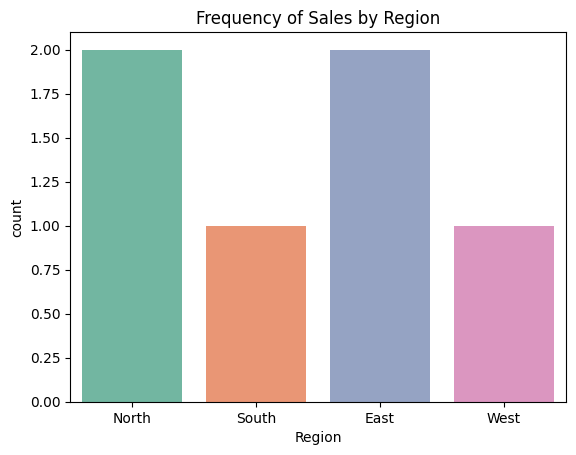

In [ ]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


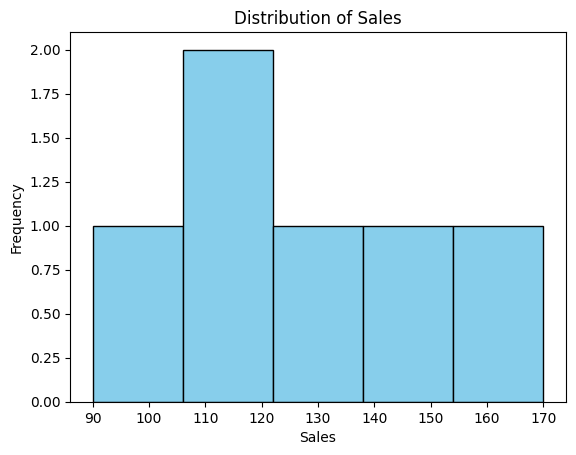

In [ ]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

Task:
Create one countplot for Product and one histogram for Profit.
Compare their patterns and interpret what they mean.

According to the countplot, products "Juice" and "Smoothie" together have the same count of sales frequency. This means that, in this dataset, there are an equal number of sales records with Juice or Smoothie labels.

According to the histogram, the distribution of profit is distributed across different values of profit. It indicates both low profits and high profits occurring across the dataset. The most profits appear to be falling between these two thresholds, as there are fewer examples of very low profit or very high profits.

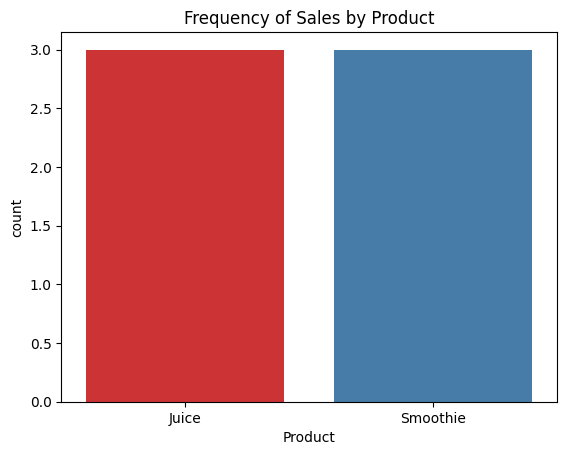

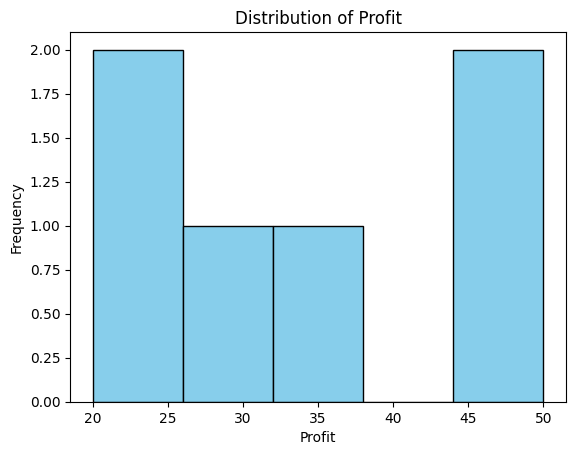

In [ ]:
sns.countplot(x="Product", data=df, palette="Set1", hue="Product")
plt.title("Frequency of Sales by Product")
plt.show()

plt.hist(df["Profit"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

Section 2: Relationships Between Variables

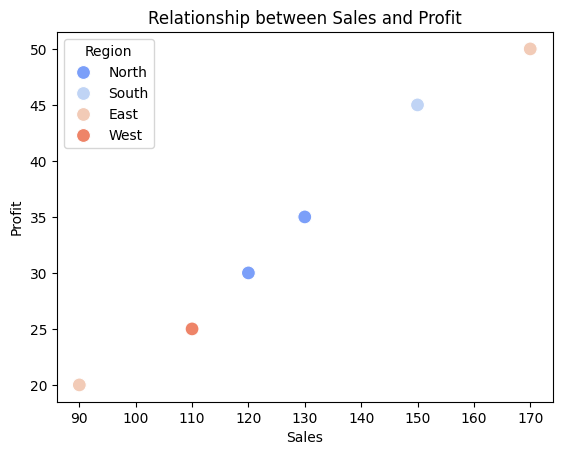

In [ ]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

In [ ]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

From inspecting the scatterplot, there seems to be a positive relationship between Sales and Profit, meaning as Sales increase, Profit also tends to increase.

Looking at the crosstab of mean sales by Region and Product, the East region had the highest mean sales for Smoothies (170.0), while the North region had the highest mean sales for Juice (125.0). So basically, the East region seems to report the highest average sales across both products when compared to other regions.



Section 3: Analysis of Missing Data

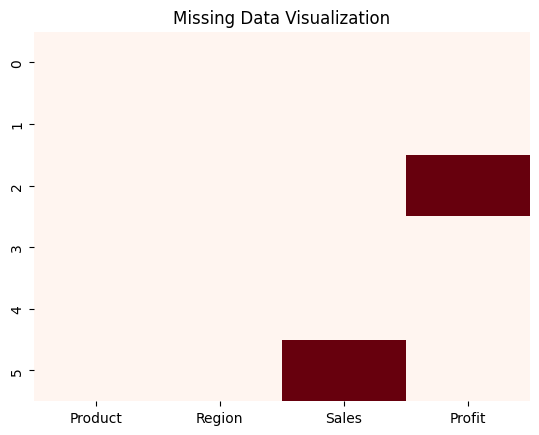

,0
Product,0
Region,0
Sales,1
Profit,1


In [ ]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

From the heatmap and summary of missing data, I can see there are missing values in "Sales" and "Profit." Missing values will have to be fixed or filled in prior to further analysis, as they will impact how accurate the results and graphs are.

Section 4: Visualizing Time-Series Data

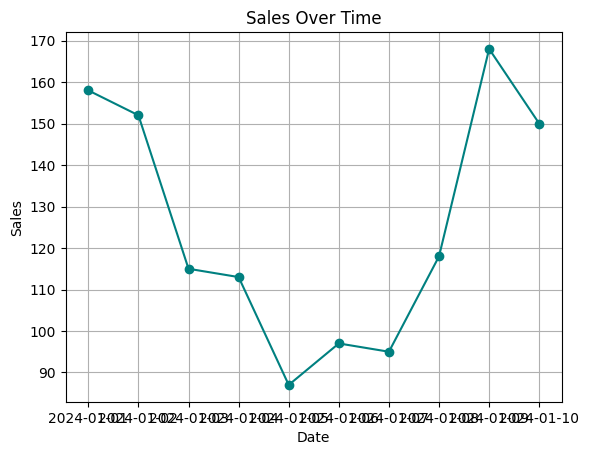

In [ ]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

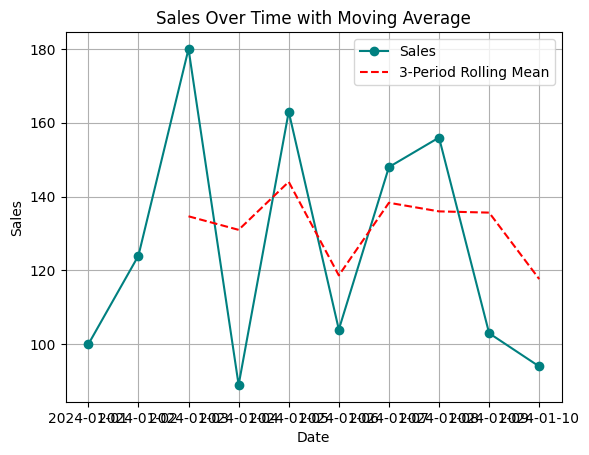

In [ ]:
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

ts_df["Sales_Rolling_Mean"] = ts_df["Sales"].rolling(window=3).mean()

plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal", label="Sales")

plt.plot(ts_df["Date"], ts_df["Sales_Rolling_Mean"], color="red", linestyle="--", label="3-Period Rolling Mean")

plt.title("Sales Over Time with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

Section 5: Visualizing Geospatial Data

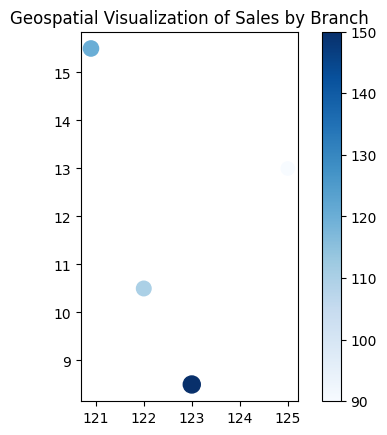

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates (latitude, longitude)
coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

# Plot simple map (Philippines outline optional if available)
gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

By looking at the map provided, it is obvious that the South branch has the greatest sales, based on the larger marker and the darker blue area on the map. The map is useful for businesses because it provides information about where to allocate their sales or identify areas that generate the most sales. In addition, it provides businesses with information about whether certain areas have similar sales trends related to their geographic areas, which is beneficial for making informed decisions about the business. In short, the map simply illustrates where the business is succeeding and where it may need to improve.

**5. Supplementary Activity**

Create your own mini exploratory analysis:

1. Choose a dataset (e.g., from Kaggle, or a CSV file you have).

2. Perform:

*   Univariate analysis (1 categorical + 1 quantitative)
*   Bivariate analysis (scatterplot or crosstab)
*   Missing data visualization
*   Time-series or geospatial visualization (choose one)
3. Summarize your key insights using visual interpretation.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset loaded successfully.


,make,model,market_regions,powertrain,first_year,body_style,origin_country
0,Tesla,Model S,Global (US/EU/UK/ME),BEV,2012,Sedan,US
1,Tesla,Model 3,Global (US/EU/UK/ME/CN),BEV,2017,Sedan,US
2,Tesla,Model X,Global (US/EU/UK/ME),BEV,2015,SUV,US
3,Tesla,Model Y,Global (US/EU/UK/ME/CN),BEV,2020,SUV,US
4,Tesla,Cybertruck,US (limited),BEV,2023,Pickup,US



Simulated 'Sales' column added for analysis.

Performing Univariate Analysis:


/tmp/ipython-input-3483612282.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="body_style", data=df, palette="viridis")


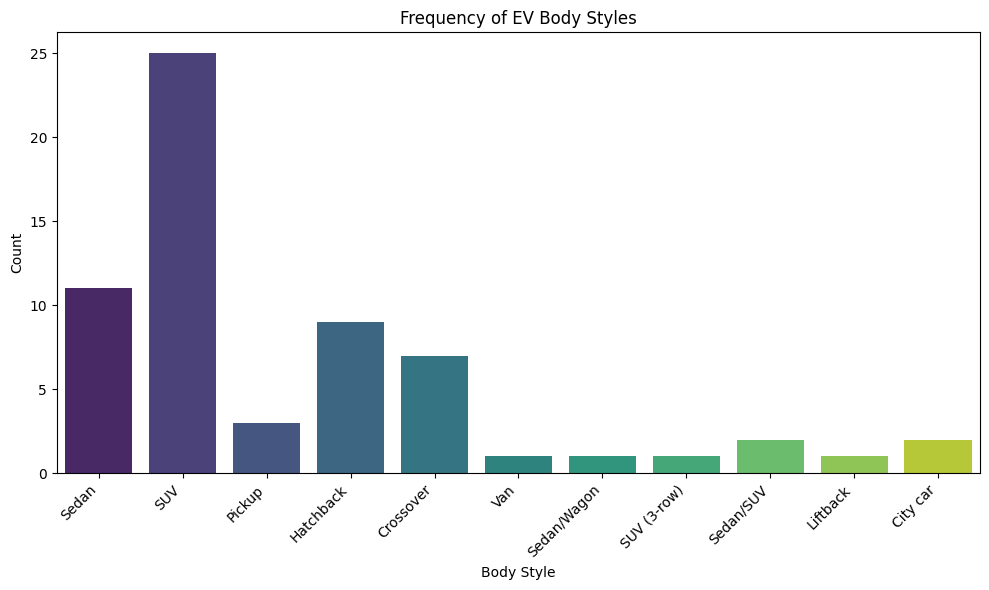

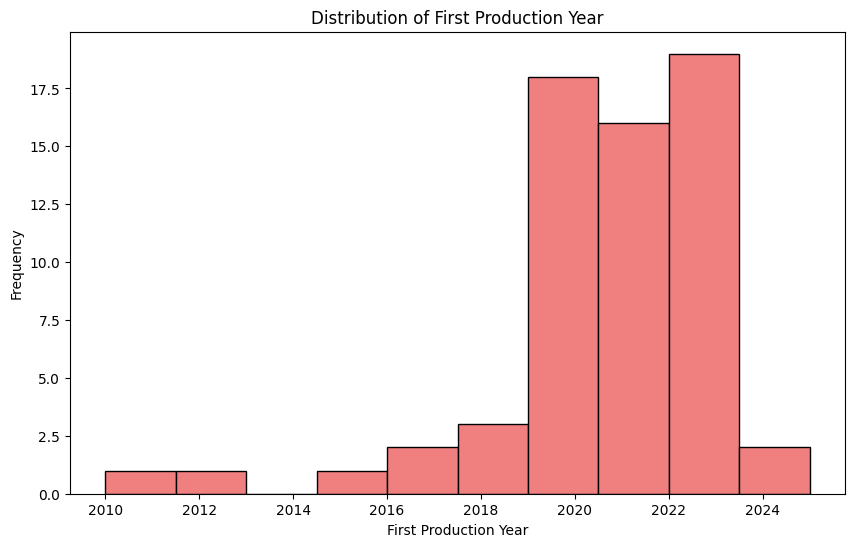


Performing Bivariate Analysis:


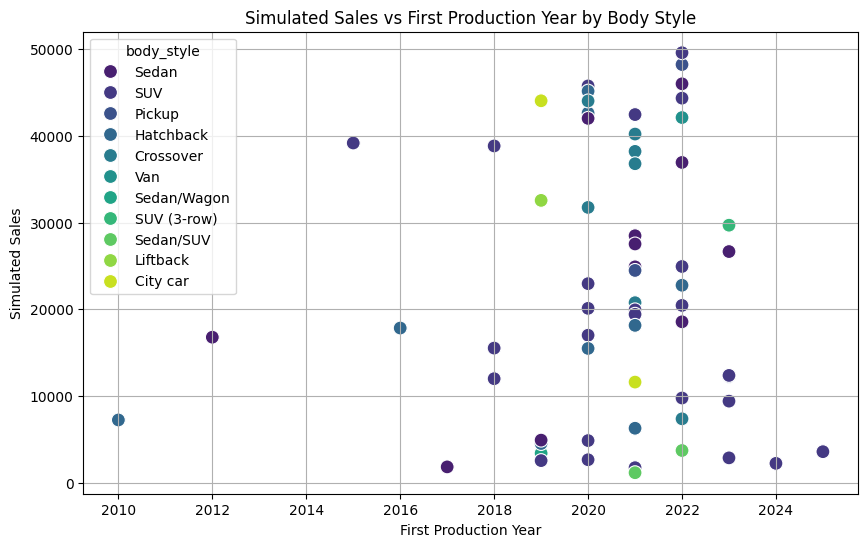

/tmp/ipython-input-3483612282.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='body_style', y='Sales', data=df, palette='viridis')


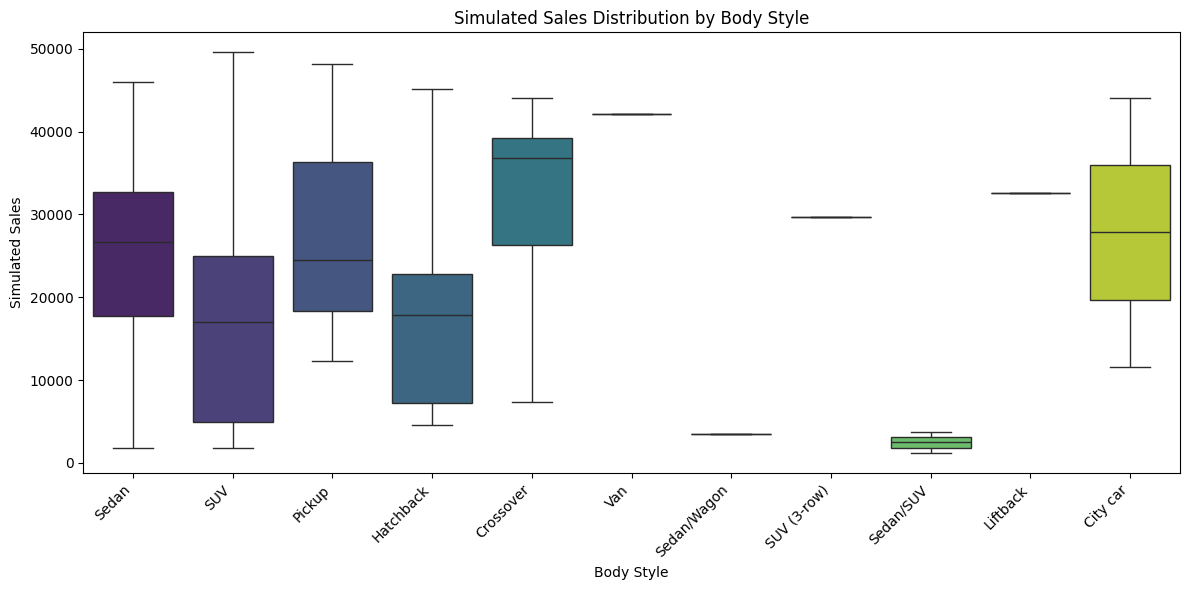


Visualizing Missing Data:


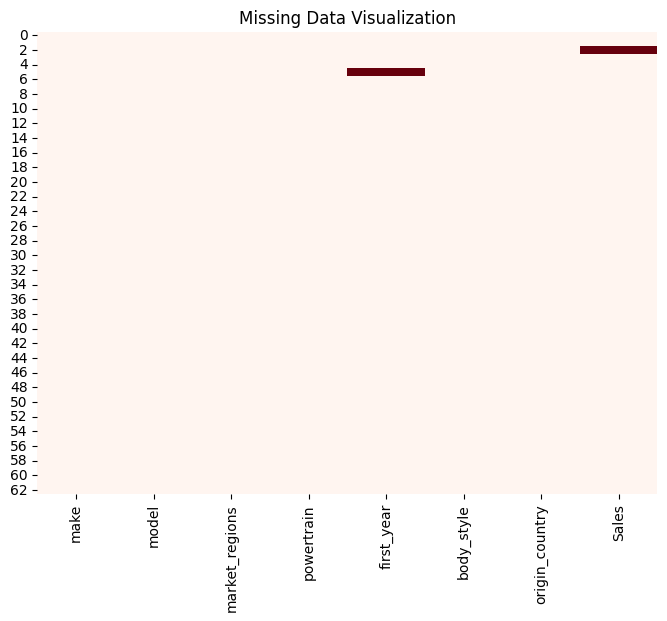


Missing values count per column:


,0
make,0
model,0
market_regions,0
powertrain,0
first_year,1
body_style,0
origin_country,0
Sales,1



Performing Conceptual Time-Series Visualization:


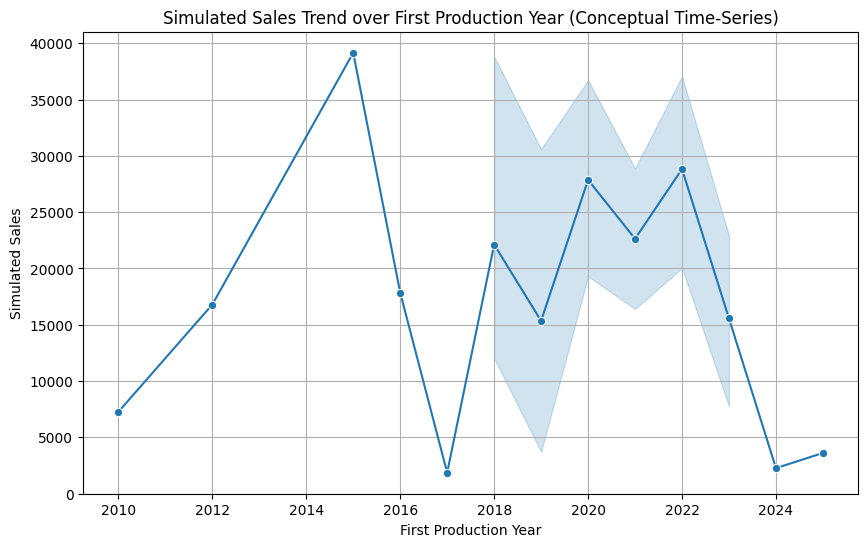

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    df = pd.read_csv("/content/drive/MyDrive/CPE 031_CENTENO/ev_models_2025.csv")
    print("Dataset loaded successfully.")
    display(df.head())
except FileNotFoundError:
    print("Error: The file was not found. Please check the path.")
    exit()

np.random.seed(42)
df['Sales'] = np.random.randint(1000, 50000, size=len(df))
print("\nSimulated 'Sales' column added for analysis.")


print("\nPerforming Univariate Analysis:")
plt.figure(figsize=(10, 6))
sns.countplot(x="body_style", data=df, palette="viridis")
plt.title("Frequency of EV Body Styles")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df["first_year"], bins=10, color="lightcoral", edgecolor="black")
plt.title("Distribution of First Production Year")
plt.xlabel("First Production Year")
plt.ylabel("Frequency")
plt.show()

print("\nPerforming Bivariate Analysis:")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='first_year', y='Sales', data=df, hue='body_style', palette='viridis', s=100)
plt.title('Simulated Sales vs First Production Year by Body Style')
plt.xlabel('First Production Year')
plt.ylabel('Simulated Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='body_style', y='Sales', data=df, palette='viridis')
plt.title('Simulated Sales Distribution by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Simulated Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nVisualizing Missing Data:")
df_missing = df.copy()
if 'Sales' in df_missing.columns:
    df_missing.loc[2, "Sales"] = np.nan
if 'first_year' in df_missing.columns:
    df_missing.loc[5, "first_year"] = np.nan

plt.figure(figsize=(8, 6))
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

print("\nMissing values count per column:")
display(df_missing.isnull().sum())

print("\nPerforming Conceptual Time-Series Visualization:")
plt.figure(figsize=(10, 6))
sns.lineplot(x='first_year', y='Sales', data=df, marker='o')
plt.title('Simulated Sales Trend over First Production Year (Conceptual Time-Series)')
plt.xlabel('First Production Year')
plt.ylabel('Simulated Sales')
plt.grid(True)
plt.show()


Examining the EV models dataset gave me insight into visual data analysis. The univariate analysis showed me the usual body types, and the first production years of models. The bivariate analysis with simulated sales data, with both scatterplots and boxplots, allowed me to check for relationships between variables, and compare sales distributions between body types. The heatmap visualizing missingness in the dataset was useful to see where data cleaning was needed, and plotting simulated sales against the first production year helped me think about how to visualize trends over time. After that experience, I learned how valuable it is to utilize several visualizations to easily gain insights from a dataset, before doing a deeper analysis.

**6. Conclusion/Learnings/Analysis:**

This exercise has taught me about visually analyzing data. I learned how to analyze single variables with countplots and histogram visualizations and analyze relationships between variables using relationships such as scatterplots and crosstabs to show, for example, patterns like the relationship between sales and profit or how regions performed. I found that using a missing data heatmap to show whether data was missing was an effective way to visually demonstrate where the data was missing. This reinforces the importance of cleaning data. I also learned that you can visualize data over time, and geospatial data. The extra activity of visualizing the dataset of EV models helped me practice all parts of the workflow from loading data to analyzing each plot. I am thankful to have gone through this hands-on process because it highlighted to me that visual analysis is often a powerful first step to understanding a data dataset.